In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
housePrices = pd.read_csv('/content/drive/MyDrive/MachineLearning/datasets/house-prices.csv')
housePrices.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


**Dataset and Normalization**

In [4]:
#size
x = []
#price
y = []

for i in range(len(housePrices)):
  row = housePrices.iloc[i]
  x.append(row['SqFt'])
  y.append(row['Price'])


In [6]:
# Find the min and max values for each column
def dataset_minmax(dataset):
  minmax = list()
  value_min = min(dataset)
  value_max = max(dataset)
  minmax.append([value_min, value_max])
	
  return minmax

# Rescale dataset columns to the range 0-1
def normalize_dataset(x,y, minmax_x, minmax_y):
  x_t = []
  y_t = []
  for x_i,y_i in zip(x,y):
    x_i = (x_i - minmax_x[0][0]) / (minmax_x[0][1] - minmax_x[0][0])
    y_i = (y_i - minmax_y[0][0]) / (minmax_y[0][1] - minmax_y[0][0])
    x_t.append(x_i)
    y_t.append(y_i)
  return x_t,y_t

minmax_x = dataset_minmax(x)
minmax_y = dataset_minmax(y)
x_norm,y_norm = normalize_dataset(x,y, minmax_x, minmax_y)
minmax_x = dataset_minmax(x_norm)
minmax_y = dataset_minmax(y_norm)

**data distribution** 

Text(0, 0.5, 'Prices ($)')

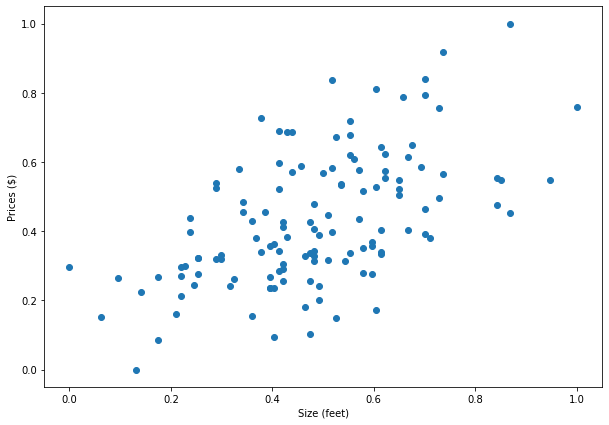

In [7]:
plt.figure(figsize=(10,7))
plt.scatter(x_norm, y_norm)
plt.xlabel('Size (feet)')
plt.ylabel('Prices ($)')

#Simple linear regression#

In [8]:
def linear_regression(x,theta0, theta1):
  pred_y = theta0 + theta1*x
  return pred_y

In [9]:
# consider just 1 input x and 1 output y 
mean_x = sum(x_norm)/len(x_norm)
print('mean of input values', mean_x)
mean_y = sum(y_norm)/len(y_norm)
print('mean of output values', mean_y)
#compute the coefficients for the simple linear regression 
#B1 (slope)
sumXY = 0
sumX = 0
for x_i,y_i in zip(x_norm,y_norm): 
  sumXY += (x_i - mean_x)*(y_i - mean_y)
  sumX += (x_i - mean_x)**2
B1 = sumXY/sumX
print('Slope:', B1)
#B0 Bias
B0 = mean_y - B1*mean_x
print('Bias:', B0)
#visualize the predictions
predictions = []
RMSE = 0
for x_i,y_i in zip(x_norm,y_norm): 
  y_pred = linear_regression(x_i,B0,B1)
  RMSE += (y_pred - y_i)**2
  print(f'Input size: {x_i}, Predicted price: {y_pred}, True Price: {y_i}')
  predictions.append(y_pred)

print('-----RMSE-----')
RMSE = math.sqrt(RMSE/len(x_norm))
print(RMSE)

mean of input values 0.48327850877192974
mean of output values 0.43157877375087966
Slope: 0.5633919971631887
Bias: 0.15930352950781457
Input size: 0.2982456140350877, Predicted price: 0.3273327216442041, True Price: 0.31808585503166786
Input size: 0.5087719298245614, Predicted price: 0.4459415631522439, True Price: 0.31738212526389864
Input size: 0.2543859649122807, Predicted price: 0.3026225463300293, True Price: 0.3216045038705137
Input size: 0.4649122807017544, Predicted price: 0.42123138783806896, True Price: 0.18015482054890922
Input size: 0.5964912280701754, Predicted price: 0.49536191378059374, True Price: 0.35679099225897254
Input size: 0.2894736842105263, Predicted price: 0.32239068658136916, True Price: 0.32019704433497537
Input size: 0.3333333333333333, Predicted price: 0.3471008618955441, True Price: 0.5805770584095707
Input size: 0.6228070175438597, Predicted price: 0.5101880189690988, True Price: 0.5742434904996482
Input size: 0.5789473684210527, Predicted price: 0.485477

**Plot Predictions**

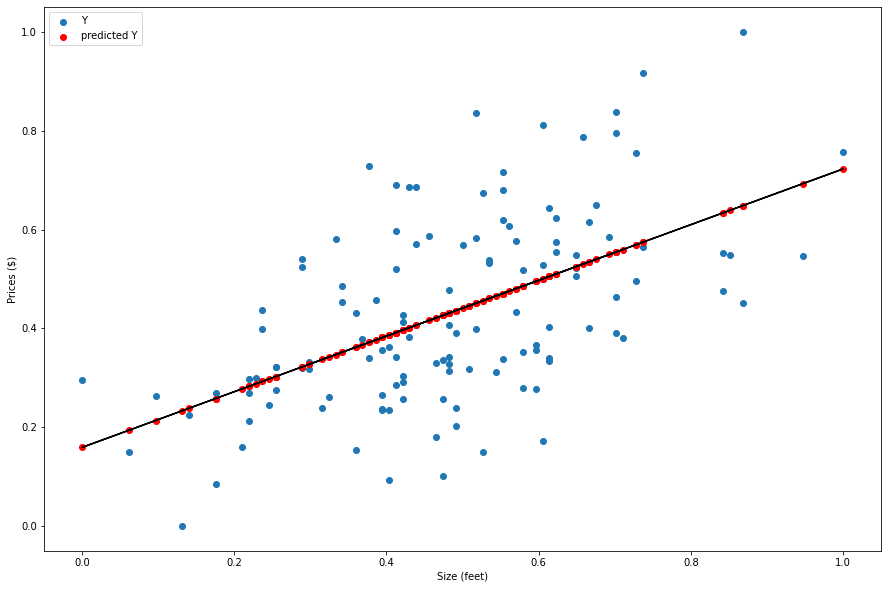

In [10]:
plt.figure(figsize=(15,10))
plt.scatter(x_norm, y_norm, label = 'Y')
plt.plot(x_norm,predictions, c = 'black')
plt.scatter(x_norm,predictions, c = 'red', label = 'predicted Y')
plt.legend(loc="upper left")
plt.xlabel('Size (feet)')
plt.ylabel('Prices ($)')
plt.show()

#Linear Regression and Gradient Descent (SGD)#

In [17]:
#normalization
minmax_x = dataset_minmax(x)
minmax_y = dataset_minmax(y)
x_norm,y_norm = normalize_dataset(x,y, minmax_x, minmax_y)
minmax_x = dataset_minmax(x_norm)
minmax_y = dataset_minmax(y_norm)

In [18]:
#using the same dataset as before x=size and y=price
X_train, X_test, y_train, y_test = train_test_split(x_norm, y_norm, random_state=0, train_size = .75)

In [19]:
# Make a prediction with coefficients
def linear_regression(x_i, B0, B1):
  yhat = B0 + B1 * x_i
  return yhat

#lr = alpha = learning rate
def SGD(x,y,lr,n_epochs):
  B0 = 0
  B1 = 0
  training_errors = []
  for epoch in range(n_epochs):
    RMSE = 0
    sum_error = 0
    for x_i,y_i in zip(x,y):
      y_pred = linear_regression(x_i, B0, B1)
      error = y_pred-y_i
      sum_error +=error**2
      B0 = B0 - lr*error
      B1 = B1 - lr*error*x_i
    RMSE = math.sqrt(sum_error/len(x))
    training_errors.append(RMSE)
    print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, lr, RMSE))
  return B0,B1,training_errors

l_rate = 0.001
n_epoch = 1000
B0,B1,training_errors = SGD(X_train,y_train, l_rate, n_epoch)
print('B0:',B0)
print('B1', B1)

>epoch=0, lrate=0.001, error=0.448
>epoch=1, lrate=0.001, error=0.406
>epoch=2, lrate=0.001, error=0.370
>epoch=3, lrate=0.001, error=0.339
>epoch=4, lrate=0.001, error=0.312
>epoch=5, lrate=0.001, error=0.288
>epoch=6, lrate=0.001, error=0.269
>epoch=7, lrate=0.001, error=0.252
>epoch=8, lrate=0.001, error=0.238
>epoch=9, lrate=0.001, error=0.226
>epoch=10, lrate=0.001, error=0.216
>epoch=11, lrate=0.001, error=0.208
>epoch=12, lrate=0.001, error=0.202
>epoch=13, lrate=0.001, error=0.196
>epoch=14, lrate=0.001, error=0.192
>epoch=15, lrate=0.001, error=0.189
>epoch=16, lrate=0.001, error=0.186
>epoch=17, lrate=0.001, error=0.183
>epoch=18, lrate=0.001, error=0.182
>epoch=19, lrate=0.001, error=0.180
>epoch=20, lrate=0.001, error=0.179
>epoch=21, lrate=0.001, error=0.178
>epoch=22, lrate=0.001, error=0.177
>epoch=23, lrate=0.001, error=0.177
>epoch=24, lrate=0.001, error=0.176
>epoch=25, lrate=0.001, error=0.176
>epoch=26, lrate=0.001, error=0.175
>epoch=27, lrate=0.001, error=0.175
>e

No handles with labels found to put in legend.


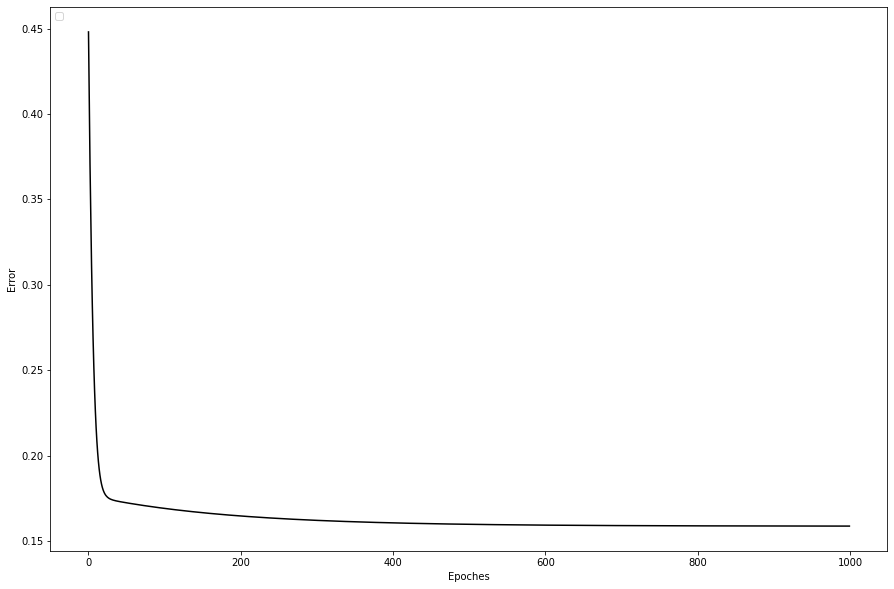

In [20]:
n_epoches = [x for x in range(0,n_epoch)]
plt.figure(figsize=(15,10))
plt.plot(n_epoches,training_errors, c = 'black')
plt.legend(loc="upper left")
plt.xlabel('Epoches')
plt.ylabel('Error')
plt.show()

**Test phase**

In [21]:
RMSE = 0
preds = []
for x_i,y_i in zip(X_test,y_test):
  y_pred = linear_regression(x_i, B0, B1)
  preds.append(y_pred)
  error = y_pred-y_i
  RMSE +=error**2
print(f'RMSE: {math.sqrt(RMSE/len(X_test))} with B0: {B0}, B1: {B1}')


RMSE: 0.15273289295688436 with B0: 0.17135593817289307, B1: 0.5544396502294059


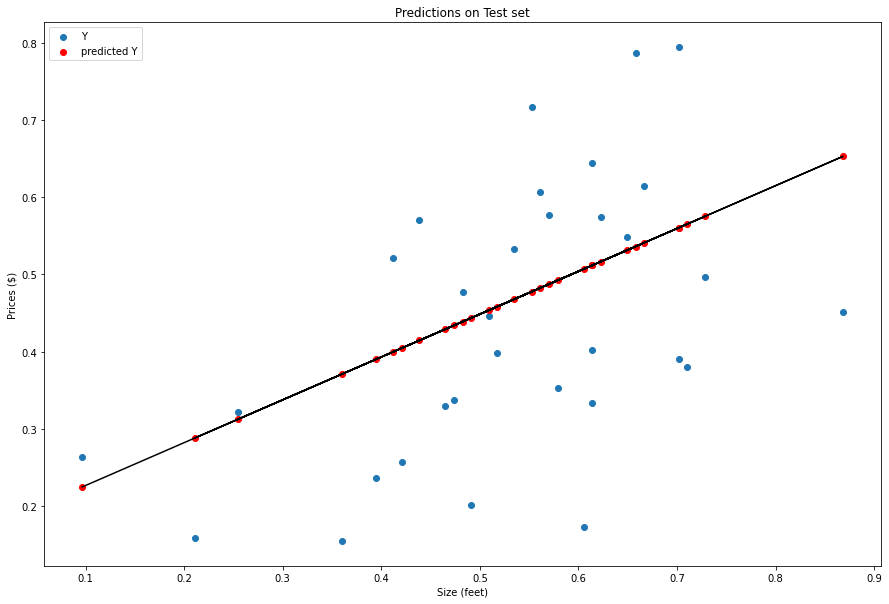

In [22]:
plt.figure(figsize=(15,10))
plt.title('Predictions on Test set')
plt.scatter(X_test, y_test, label = 'Y')
plt.plot(X_test,preds, c = 'black')
plt.scatter(X_test,preds, c = 'red', label = 'predicted Y')
plt.legend(loc="upper left")
plt.xlabel('Size (feet)')
plt.ylabel('Prices ($)')
plt.show()

#Multiple Linear Regression#

In [23]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

In [24]:
#linear regression with 2 parameters (example Andrew Ng with house size and n.bedrooms)
x1 = []
x2 = []
y = []
for i in range(len(housePrices)):
  row = housePrices.iloc[i]
  x1.append(row['SqFt'])
  x2.append(row['Bedrooms'])
  y.append(row['Price'])


In [27]:
def dataset_minmax(dataset):
  minmax = list()
  value_min = min(dataset)
  value_max = max(dataset)
  minmax.append([value_min, value_max])
  return minmax

# Rescale dataset columns to the range 0-1
def normalize_dataset(x,minmax_x):
  x_t = []
  for x_i in x:
    x_i = (x_i - minmax_x[0][0]) / (minmax_x[0][1] - minmax_x[0][0])
    x_t.append(x_i)
  return x_t

In [29]:
min_maxX1 = dataset_minmax(x1)
min_maxX2 = dataset_minmax(x2)
min_maxY = dataset_minmax(y)
x1_norm = normalize_dataset(x1, min_maxX1)
x2_norm = normalize_dataset(x2, min_maxX2)
y_norm = normalize_dataset(y, min_maxY)

Text(0.5, 0, 'Price')

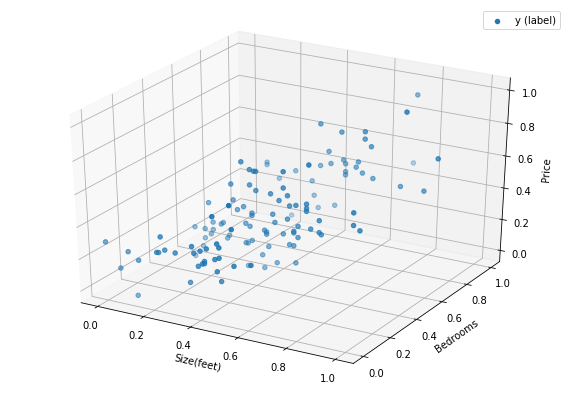

In [30]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111, projection='3d')
 
ax.scatter(x1_norm, x2_norm, y_norm, label ='y (label)', marker='o')
ax.legend()
 
ax.set_xlabel('Size(feet)')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')

In [31]:
x_data = {'Size': x1_norm, 'Bedrooms':x2_norm}
X = pd.DataFrame(x_data, columns=['Size', 'Bedrooms'])
X_train, X_test, y_train, y_test = train_test_split(X, y_norm, test_size = 0.3, random_state=42)
print('len X_train: ', len(X_train))
print('len X_test: ', len(X_test))

len X_train:  89
len X_test:  39


In [33]:
# Make a prediction with coefficients
def multiple_linear_regression(x1_i, x2_i, B0, B1, B2):
  yhat = B0 + B1 * x1_i + B2*x2_i
  return yhat

def SGD_for_MLR(x,y,lr,n_epochs):
  B0 = 0
  B1 = 0
  B2 = 0
  training_errors = []
  for epoch in range(n_epochs):
    RMSE = 0
    sum_error = 0
    for (index,x_i),y_i in zip(x.iterrows(),y):
      x1_i = x_i['Size']
      x2_i = x_i['Bedrooms']
      y_pred = multiple_linear_regression(x1_i, x2_i, B0, B1, B2)
      error = y_pred-y_i
      sum_error +=error**2
      B0 = B0 - lr*error
      B1 = B1 - lr*error*x1_i
      B2 = B2 - lr*error*x2_i
    RMSE = math.sqrt(sum_error/len(x))
    training_errors.append(RMSE)
    print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, lr, RMSE))
  return B0,B1,B2, training_errors

l_rate = 0.01
n_epoch = 500
B0,B1,B2,training_errors = SGD_for_MLR(X_train,y_train, l_rate, n_epoch)
print(' end training phase ---------------------------------------------')
print('B0:',B0)
print('B1', B1)
print('B2', B2)

>epoch=0, lrate=0.010, error=0.317
>epoch=1, lrate=0.010, error=0.181
>epoch=2, lrate=0.010, error=0.165
>epoch=3, lrate=0.010, error=0.164
>epoch=4, lrate=0.010, error=0.163
>epoch=5, lrate=0.010, error=0.163
>epoch=6, lrate=0.010, error=0.162
>epoch=7, lrate=0.010, error=0.161
>epoch=8, lrate=0.010, error=0.161
>epoch=9, lrate=0.010, error=0.160
>epoch=10, lrate=0.010, error=0.159
>epoch=11, lrate=0.010, error=0.159
>epoch=12, lrate=0.010, error=0.159
>epoch=13, lrate=0.010, error=0.158
>epoch=14, lrate=0.010, error=0.158
>epoch=15, lrate=0.010, error=0.157
>epoch=16, lrate=0.010, error=0.157
>epoch=17, lrate=0.010, error=0.157
>epoch=18, lrate=0.010, error=0.156
>epoch=19, lrate=0.010, error=0.156
>epoch=20, lrate=0.010, error=0.156
>epoch=21, lrate=0.010, error=0.156
>epoch=22, lrate=0.010, error=0.155
>epoch=23, lrate=0.010, error=0.155
>epoch=24, lrate=0.010, error=0.155
>epoch=25, lrate=0.010, error=0.155
>epoch=26, lrate=0.010, error=0.155
>epoch=27, lrate=0.010, error=0.154
>e

*Comparing the results between the model defined from scratch and the sklearn model*

In [34]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)
B0_sk = LR.intercept_
B1_sk,B2_sk = LR.coef_
print('B0 sklearn:', B0_sk)
print('B1 sklearn:', B1_sk)
print('B2 sklearn:', B2_sk)

B0 sklearn: 0.12418569766873899
B1 sklearn: 0.47554282800888964
B2 sklearn: 0.2151219677274062


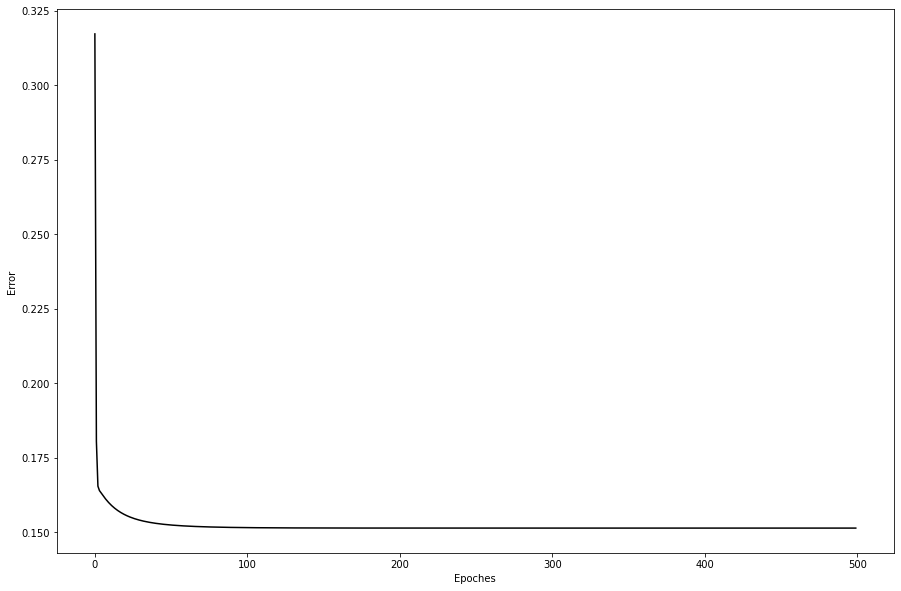

In [35]:
n_epoches = [x for x in range(0,n_epoch)]
plt.figure(figsize=(15,10))
plt.plot(n_epoches,training_errors, c = 'black')
plt.xlabel('Epoches')
plt.ylabel('Error')
plt.show()

**Multiple Linear Regression Test Phase**

*Comparison between model defined from scratch  and Sklearn model in terms of RMSE*

In [37]:
from sklearn.metrics import mean_squared_error

def test_phase(B0, B1, B2):
  RMSE = 0
  preds = []
  for (index,x_i),y_i in zip(X_test.iterrows(),y_test):
    x1_i = x_i['Size']
    x2_i = x_i['Bedrooms']
    y_pred = multiple_linear_regression(x1_i, x2_i, B0, B1, B2)
    preds.append(y_pred)
    error = y_pred-y_i
    RMSE +=error**2
  print(f'RMSE: {math.sqrt(RMSE/len(X_test))} with B0: {B0}, B1: {B1}, B1: {B2}')
  return preds

print(' RMSE for Multiple Linear Regression define from sscratch ------------')
preds = test_phase(B0, B1, B2)
print('')
print(' RMSE for SKlearn Multiple Linear Regression  ------------')
y_prediction =  LR.predict(X_test)
RMSE_sk = mean_squared_error(y_test,y_prediction)
print(f'RMSE: {np.sqrt(RMSE_sk)} with B0: {B0_sk}, B1: {B1_sk}, B1: {B2_sk}')


 RMSE for Multiple Linear Regression define from sscratch ------------
RMSE: 0.13974482449409445 with B0: 0.1315299320890534, B1: 0.472291664929894, B1: 0.21512640355662363

 RMSE for SKlearn Multiple Linear Regression  ------------
RMSE: 0.1403133007777746 with B0: 0.12418569766873899, B1: 0.47554282800888964, B1: 0.2151219677274062


*MLR from scratch prediction visualization*

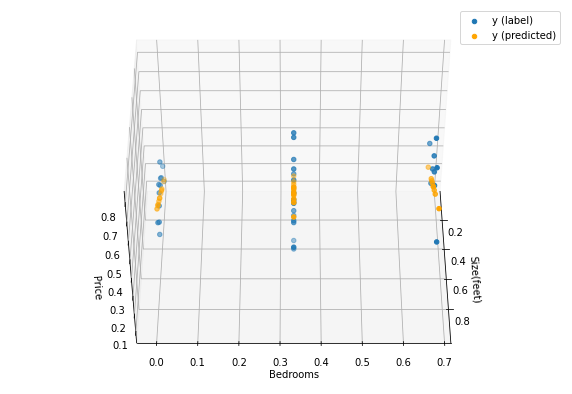

In [38]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111, projection='3d')
 
ax.scatter(X_test['Size'], X_test['Bedrooms'], y_test, label ='y (label)')
ax.scatter(X_test['Size'], X_test['Bedrooms'], preds, label ='y (predicted)', c='orange')
 
ax.set_xlabel('Size(feet)')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.view_init(45, 0)
ax.legend()
plt.show()

#Locally Weighted Regression #

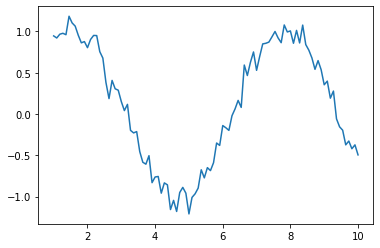

In [39]:
#Consider a dataset with the following distribution
x_data = np.linspace(1, 10, num=100)
y_data = np.sin(x_data)+np.random.normal(scale=0.1, size=len(x_data))
plt.plot(x_data,y_data)

In [40]:
X_t = pd.DataFrame(x_data)
y_t = pd.DataFrame(y_data)

In [41]:
#considering again size houses as x and house prices as the y we want to predict
# function to calculate W weight diagonal Matrix used in calculation of predictions
#n.b. here x is the point to make the prediction, x_i a possible neightbor point
def weigthts_matrix(x, X_data, tau):
  # m is the No of training examples
  m = len(X_data)
  # Initialising W with identity matrix
  W = np.mat(np.eye(m))
  # calculating weights for query points
  for i in range(0,m):
    x_i = X_data[i]
    tau_sqr = (-2*tau**2)
    W[i, i] = np.exp(np.dot((x_i-x), (x_i-x).T)/tau_sqr)
  return W

#here we consider the normal equation allowing to find the optimal value of theta directly
def norm_equation(X_eqs,W,y):
  theta = np.linalg.pinv(X_eqs.T*(W * X_eqs))*(X_eqs.T*(W * y))
  return theta


def LWR(X_data, y, x, tau):
  m = len(X_data)
  ones = np.ones((m, 1))
  X_eqs = np.hstack((X_data, ones))
  qx = np.mat([x, 1])
  W = weigthts_matrix(qx,X_eqs, tau)
  # calculating parameter theta
  theta = norm_equation(X_eqs,W,y)
  # calculating predictions
  pred = np.dot(qx, theta)
  return theta, pred


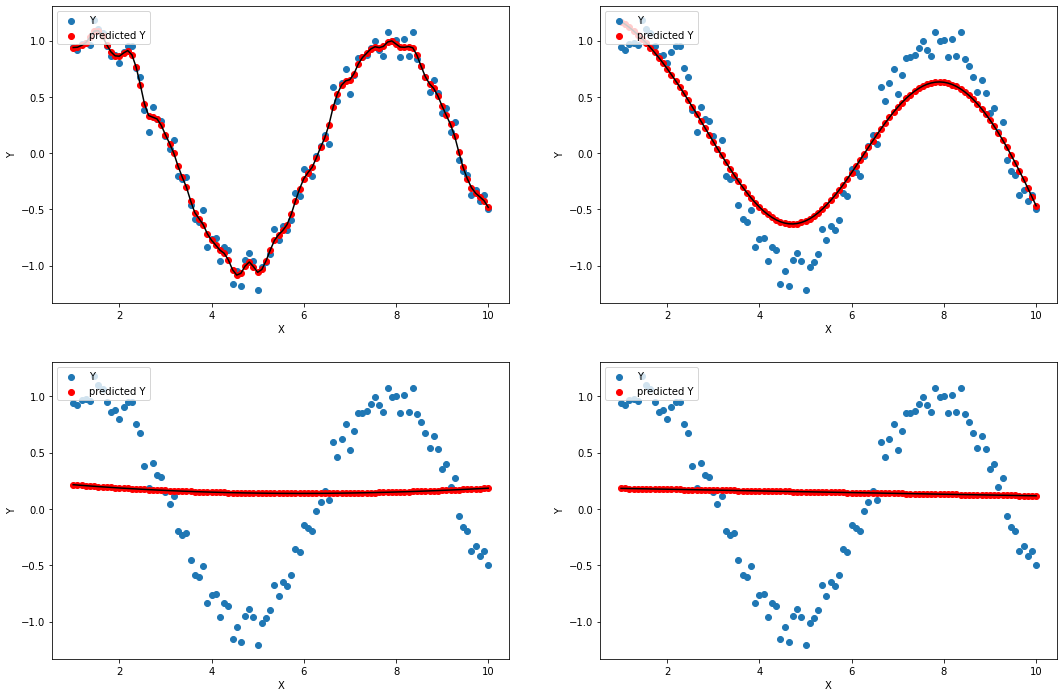

In [57]:
#value for the bandwidth used to make the bell-shape curve fatter or thinner

def test_tau(tau):
  y_pred = []
  for index,x in X_t.iterrows():
    x = x[0]
    theta, pred = LWR(X_t.values, y_t.values, x, tau)
    y_pred.append(pred[0,0])
  return y_pred
  

tau = [0.1,1,10,100]
fig, axs = plt.subplots(2,2, figsize=(18,12))
for (i,ax) in enumerate(axs.flat):
  t = tau[i]
  y_pred = test_tau(t)
  ax.scatter(X_t, y_t, label = 'Y')
  ax.plot(X_t.values,y_pred, c = 'black')
  ax.scatter(X_t,y_pred, c = 'red', label = 'predicted Y')
  ax.legend(loc="upper left")
  ax.set_xlabel('X')
  ax.set_ylabel('Y')